In [225]:
import pandas as pd
import geopandas as gpd
import folium
import rasterio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from shapely.geometry import Point
import os
import numpy as np
from pyproj import CRS
import pyproj
import folium
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Land (raster)

In [2]:
tiff_path = "./data/land_cover/DATA/U2018_CLC2018_V2020_20u1.tif"

In [3]:
with rasterio.open(tiff_path) as raster:
    src = raster
    raster_data = raster.read(1)  # Reading the first band
    crs = raster.crs

In [4]:
with rasterio.open(tiff_path) as raster:
    print(raster.profile)

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 65000, 'height': 46000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]'), 'transform': Affine(100.0, 0.0, 900000.0,
       0.0, -100.0, 5500000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'packbits', 'interleave': 'band'}


In [5]:
crs

CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]')

In [6]:
transform = src.transform

In [7]:
def create_point(row, col):
    x, y = rasterio.transform.xy(src.transform, row, col, offset='center')
    return Point(x,y)

In [8]:
raster_df = pd.DataFrame(raster_data)
raster_df

0      1      2      3      4      5      6      7      8      9      \
0       -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
1       -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
2       -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
3       -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
4       -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
45995   -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45996   -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45997   -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45998   -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45999   -128   -128   -128   -128   -128   -128   -128   -128   -128   -128   

       ...  64990  64991  64992  64993  64994  64995  64996  64997  64998  \
0      ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
1      ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
2      ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
3      ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
4      ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
45995  ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45996  ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45997  ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45998  ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   
45999  ...   -128   -128   -128   -128   -128   -128   -128   -128   -128   

       64999  
0       -128  
1       -128  
2       -128  
3       -128  
4       -128  
...      ...  
45995   -128  
45996   -128  
45997   -128  
45998   -128  
45999   -128  

[46000 rows x 65000 columns]

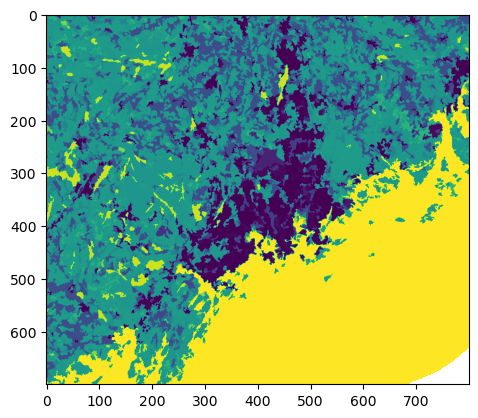

<Axes: >

In [9]:
df_finland = raster_df.iloc[12500:13200, 42000:42800]
df_finland[df_finland < 0] = np.nan
show(np.array(df_finland), cmap='viridis')

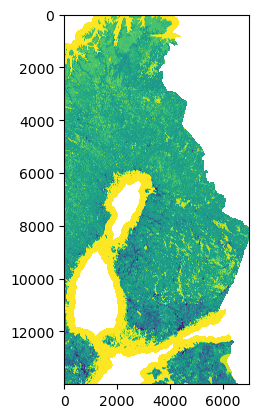

<Axes: >

In [10]:
df_finland = raster_df.iloc[1000:15000, 38000:45000]
df_finland[df_finland < 0] = np.nan
show(np.array(df_finland), cmap='viridis')

In [11]:
pd.unique(np.array(df_finland).flatten())

array([nan, 44., 32., 31., 27., 21., 41.,  2., 36., 30., 23.,  6., 39.,
        5., 11., 25.,  7., 40., 12.,  9.,  3., 20., 34., 29., 24., 26.,
       35., 18.,  8., 10.,  4., 33., 37., 43., 42.,  1., 16.])

In [12]:
def get_gps(x, y):
    lat, lon = rasterio.transform.xy(src.transform, y, x, offset='center')
    return lon, lat

In [13]:
laea_to_fin = pyproj.Transformer.from_crs("EPSG: 3035", "EPSG: 3386")
def convert(x, y):
    x_gps, y_gps = get_gps(x, y)
    y_fin, x_fin = laea_to_fin.transform(x_gps, y_gps)
    y_fin, x_fin = round(y_fin, -2), round(x_fin, -2)
    return x_fin,y_fin

In [14]:
index_shift = df_finland.index[0]
master_data = []
for col in df_finland:
    if col % 10 == 0:
        for i, value in enumerate(df_finland[col]):
            if i % 10 == 0:
                x,y = convert(col, i+index_shift)
                master_data.append([x, y, value])

master_land_df = pd.DataFrame(master_data, columns=["x", "y", "land"])
master_land_df

x          y  land
0        591800.0  7936800.0   NaN
1        591600.0  7935800.0   NaN
2        591500.0  7934800.0   NaN
3        591400.0  7933800.0   NaN
4        591300.0  7932800.0   NaN
...           ...        ...   ...
979995  1114700.0  6466200.0   NaN
979996  1114600.0  6465200.0   NaN
979997  1114500.0  6464300.0   NaN
979998  1114400.0  6463300.0   NaN
979999  1114300.0  6462300.0   NaN

[980000 rows x 3 columns]

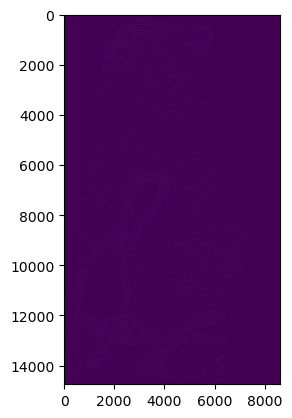

<Axes: >

In [15]:
show(np.array(master_land_df.pivot(index="y", columns="x", values="land").reset_index(drop=True).iloc[::-1].fillna(0)), cmap="viridis")

In [16]:
# data = []

# # Iterate through each pixel
# for row in range(df_finland.shape[0]):
#     for col in range(df_finland.shape[1]):
#         value = df_finland.loc[row + 12500, col + 42000]
#         if value != -128:
#             # Get the coordinates for the center of the pixel
#             x, y = rasterio.transform.xy(transform, row + 1000, col + 38000, offset='center')
            
#             # Append to data list
#             data.append({'geometry': Point(x, y), 'value': value})
#             print(f"{round(len(data) / (700*800) * 100, 1)} %")

In [17]:
# gdf = gpd.GeoDataFrame(data)
# gdf

In [18]:
# crs_wkt = CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]')

# # Assign the CRS to the GeoDataFrame
# # gdf.set_crs(crs_wkt, inplace=True)
# gdf.set_crs("ETRS89")

In [19]:
# gdf.sample(frac=0.01).explore()

# Soil

In [20]:
path = "./data/HWSD2_RASTER/HWSD2.bil"
with rasterio.open(path) as raster:
    src = raster
    raster_data = raster.read(1)  # Reading the first band
    crs = raster.crs

with rasterio.open(path) as raster:
    print(raster.profile)
raster_transform = src.transform

{'driver': 'EHdr', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 43200, 'height': 21600, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'), 'transform': Affine(0.00833333333333333, 0.0, -179.99999999999966,
       0.0, -0.00833333333333333, 89.99999999999996), 'blockysize': 1, 'tiled': False}


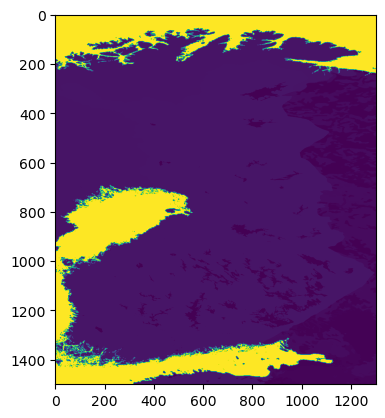

<Axes: >

In [21]:
soil_df_finland = pd.DataFrame(raster_data).iloc[2200:3700, 24100:25400]
show(np.array(soil_df_finland), cmap='viridis')

In [22]:
# soil_df_finland = pd.DataFrame(raster_data).iloc[3300:3600, 24500:24900]
# show(np.array(soil_df_finland), cmap='viridis')

In [23]:
soil_df_finland

24100  24101  24102  24103  24104  24105  24106  24107  24108  24109  \
2200  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2201  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2202  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2203  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2204  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3695  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
3696  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
3697  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
3698  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   
3699  65535  65535  65535  65535  65535  65535  65535  65535  65535  65535   

      ...  25390  25391  25392  25393  25394  25395  25396  25397  25398  \
2200  ...  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2201  ...  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2202  ...  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2203  ...  65535  65535  65535  65535  65535  65535  65535  65535  65535   
2204  ...  65535  65535  65535  65535  65535  65535  65535  65535  65535   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3695  ...   7810   7810   7810   7810   7810   7810   7810   7810   7810   
3696  ...   7810   7810   7810   7810   7810   7810   7810   7810   7810   
3697  ...   7810   7810   7810   7810   7810   7810   7810   7810   7810   
3698  ...   7810   7810   7810   7810   7810   7810   7810   7810   7810   
3699  ...   7810   7810   7810   7810   7810   7810   7810   7810   7810   

      25399  
2200  65535  
2201  65535  
2202  65535  
2203  65535  
2204  65535  
...     ...  
3695   7810  
3696   7810  
3697   7810  
3698   7810  
3699   7111  

[1500 rows x 1300 columns]

In [24]:
def get_gps(x, y):
    lat, lon = rasterio.transform.xy(raster_transform, y, x, offset='center')
    return lon, lat

In [25]:
gps_to_fin = pyproj.Transformer.from_crs("EPSG: 4326", "EPSG: 3386")
def convert(x, y):
    x_gps, y_gps = get_gps(x, y)
    y_fin, x_fin = gps_to_fin.transform(x_gps, y_gps)
    y_fin, x_fin = round(y_fin, -2), round(x_fin, -2)
    return x_fin,y_fin

In [26]:
index_shift = soil_df_finland.index[0]
master_data = []
for col in soil_df_finland:
    for i, value in enumerate(soil_df_finland[col]):
        x,y = convert(int(col), i+index_shift)
        master_data.append([x, y, value])

master_df = pd.DataFrame(master_data, columns=["x", "y", "soil"])
master_df

x          y   soil
0         599800.0  7957000.0  65535
1         599900.0  7956000.0  65535
2         599900.0  7955100.0  65535
3         600000.0  7954200.0  65535
4         600000.0  7953300.0  65535
...            ...        ...    ...
1949995  1277200.0  6645700.0   7810
1949996  1277400.0  6644800.0   7810
1949997  1277600.0  6643900.0   7810
1949998  1277800.0  6643000.0   7810
1949999  1278000.0  6642100.0   7111

[1950000 rows x 3 columns]

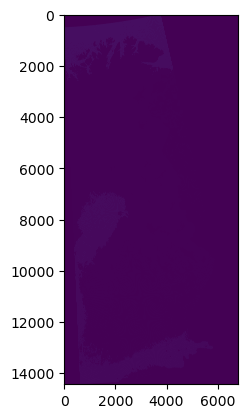

<Axes: >

In [27]:
show(np.array(master_df.pivot(index="y", columns="x", values="soil").reset_index(drop=True).iloc[::-1].fillna(0)), cmap="viridis")

# Coefficients

## Soilmap

In [28]:
soil_map = pd.read_excel("soil_values.xlsx")
soil_map = soil_map[["soil_number", "soil type"]]
soil_map = dict(zip(soil_map["soil_number"], soil_map["soil type"]))
soil_map

{65535: nan,
 10411: 'PZ',
 10412: 'PZ',
 10415: 'HS',
 10086: 'PZ',
 10413: 'PZ',
 10095: 'RG',
 10410: 'PZ',
 7230: 'WR',
 10093: 'PZ',
 7003: 'WR',
 10087: 'PZ',
 10090: 'RG',
 10417: 'HS',
 10418: 'HS',
 7620: 'RT',
 10406: 'LP',
 7111: 'HS',
 8776: 'PZ',
 8846: 'PZ',
 10409: 'CM',
 7670: 'RT',
 10117: 'CR',
 10083: 'PZ',
 8596: 'HS',
 7192: 'PZ',
 10407: 'RG',
 10085: 'HS',
 8840: 'PZ',
 7685: 'RT',
 7671: 'RT',
 10503: 'LV',
 10405: 'GL',
 7822: 'ST',
 8909: 'PZ',
 10473: 'PZ',
 10484: 'LV',
 7173: 'PZ',
 10479: 'GL',
 10080: 'PZ',
 8904: 'PZ',
 8777: 'PZ',
 7806: 'ST',
 8684: 'PZ',
 10514: 'GL',
 8824: 'PZ',
 8842: 'PZ',
 10084: 'HS',
 7810: 'ST',
 7864: 'LP',
 8888: 'PZ',
 10414: 'HS',
 10498: 'CM',
 10081: 'PZ',
 8747: 'PZ',
 10518: 'HS',
 7168: 'PZ',
 7189: 'PZ',
 10474: 'PZ',
 10485: 'LV',
 10476: 'PZ',
 10489: 'LV',
 7612: 'RT',
 10511: 'GL',
 10079: 'PZ',
 7296: 'CM',
 9136: 'CR',
 10517: 'PZ',
 8724: 'PZ',
 7066: 'GL',
 10487: 'RT',
 10520: 'HS',
 7001: 'TC',
 7800: 'RT',

## Land cover map

In [29]:
land_cover_map = pd.DataFrame(gpd.read_file("./data/land_cover/DATA/U2018_CLC2018_V2020_20u1.tif.vat.dbf"))[["Value", "LABEL3"]]
land_cover_map = dict(zip(land_cover_map["Value"], land_cover_map["LABEL3"]))
land_cover_map

{1: 'Continuous urban fabric',
 2: 'Discontinuous urban fabric',
 3: 'Industrial or commercial units',
 4: 'Road and rail networks and associated land',
 5: 'Port areas',
 6: 'Airports',
 7: 'Mineral extraction sites',
 8: 'Dump sites',
 9: 'Construction sites',
 10: 'Green urban areas',
 11: 'Sport and leisure facilities',
 12: 'Non-irrigated arable land',
 13: 'Permanently irrigated land',
 14: 'Rice fields',
 15: 'Vineyards',
 16: 'Fruit trees and berry plantations',
 17: 'Olive groves',
 18: 'Pastures',
 19: 'Annual crops associated with permanent crops',
 20: 'Complex cultivation patterns',
 21: 'Land principally occupied by agriculture, with significant areas of natural vegetation',
 22: 'Agro-forestry areas',
 23: 'Broad-leaved forest',
 24: 'Coniferous forest',
 25: 'Mixed forest',
 26: 'Natural grasslands',
 27: 'Moors and heathland',
 28: 'Sclerophyllous vegetation',
 29: 'Transitional woodland-shrub',
 30: 'Beaches, dunes, sands',
 31: 'Bare rocks',
 32: 'Sparsely vegetated 

## Land coverage coefficient

In [240]:
land_cover_coefficients = pd.read_excel("Land_coverage_coefficients.xlsx")
land_cover_coefficients["Coefficient"] = land_cover_coefficients["Coefficient"] / 3
land_cover_coefficients["Coefficient"] = land_cover_coefficients["Coefficient"].round(2)
land_cover_coefficients = dict(zip(land_cover_coefficients["Number"], land_cover_coefficients["Coefficient"]))
land_cover_coefficients

{1: 0.33,
 2: 0.67,
 3: 0.33,
 4: 0.0,
 5: 0.0,
 6: 0.33,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 1.0,
 11: 0.0,
 12: 0.67,
 13: 1.0,
 14: 0.33,
 15: 0.67,
 16: 1.0,
 17: 1.0,
 18: 0.67,
 19: 0.67,
 20: 0.67,
 21: 1.0,
 22: 1.0,
 23: 0.33,
 24: 0.33,
 25: 0.33,
 26: 0.67,
 27: 0.33,
 28: 0.67,
 29: 0.67,
 30: 0.33,
 31: 0.0,
 32: 0.67,
 33: 0.67,
 34: 0.0,
 35: 0.67,
 36: 0.33,
 37: 0.33,
 38: 0.33,
 39: 0.33,
 40: 1.0,
 41: 1.0,
 42: 0.67,
 43: 0.67,
 44: 0.0}

# Cities

In [31]:
xmin = master_land_df.x.min()
xmax = master_land_df.x.max()
ymin = master_land_df.y.min()
ymax = master_land_df.y.max()

In [32]:
(xmax-xmin) / 100000

8.61

# Weather stations

In [248]:
weather_stations = pd.read_excel("weather_stations.xlsx")
weather_stations

station        x        y
0               Ähtäri   816399  6953428
1                Inari   885331  7622349
2              Kittilä   822262  7584057
3   Kristiinankaupunki   675642  6912197
4              Kuusamo  1007846  7368204
5                Lohja   834913  6696842
6              Loviisa   952145  6733551
7              Mikkeli   989818  6877363
8               Muonio   738094  7552006
9                 Pori   702442  6825600
10            Puolanka   957492  7231793
11           Pyhäjärvi   894412  7089141
12          Rautavaara  1011535  7084908
13           Rovaniemi   843498  7400468
14               Salla   966947  7455964
15           Savukoski   936369  7502914
16         Taivalkoski   971361  7314094
17               Turku   734879  6718799
18             Utsjoki   845373  7784596
19               Vaasa   682782  7004273
20           Virolahti  1030960  6758477
21           Ylitornio   754183  7370127
22           Ylivieska   818644  7124426

In [293]:
geometry = [Point(row.x, row.y) for i, row in weather_stations.iterrows()]
geometry

[<POINT (8.16e+05 6.95e+06)>,
 <POINT (8.85e+05 7.62e+06)>,
 <POINT (8.22e+05 7.58e+06)>,
 <POINT (6.76e+05 6.91e+06)>,
 <POINT (1.01e+06 7.37e+06)>,
 <POINT (8.35e+05 6.7e+06)>,
 <POINT (9.52e+05 6.73e+06)>,
 <POINT (9.9e+05 6.88e+06)>,
 <POINT (7.38e+05 7.55e+06)>,
 <POINT (7.02e+05 6.83e+06)>,
 <POINT (9.57e+05 7.23e+06)>,
 <POINT (8.94e+05 7.09e+06)>,
 <POINT (1.01e+06 7.08e+06)>,
 <POINT (8.43e+05 7.4e+06)>,
 <POINT (9.67e+05 7.46e+06)>,
 <POINT (9.36e+05 7.5e+06)>,
 <POINT (9.71e+05 7.31e+06)>,
 <POINT (7.35e+05 6.72e+06)>,
 <POINT (8.45e+05 7.78e+06)>,
 <POINT (6.83e+05 7e+06)>,
 <POINT (1.03e+06 6.76e+06)>,
 <POINT (7.54e+05 7.37e+06)>,
 <POINT (8.19e+05 7.12e+06)>]

In [298]:
gpd.GeoDataFrame(geometry=geometry, data=weather_stations).set_crs("EPSG:3386").explore()

In [331]:
def get_nearest_station(x, y):
    dist = ((weather_stations.x - x)**2 + (weather_stations.y - y)**2) ** 0.5
    return dist.idxmin()

In [332]:
get_nearest_station(834913, 6696842 + 2000)

5

# Functions

In [ ]:
import json

with open("plants.json", "r") as file:
    plant_data = json.load(file)

def soilScore(soil: str, plant: str) -> float:
    try:
        cmp = plant_data['Plants'][plant]['soils'][soil]
    except:
        cmp = 0.0
    return cmp

trees = list(plant_data["Plants"])
trees

# Weather compability

In [ ]:
weather_coefficients = pd.read_excel("weatherCompatibilities.xlsx", header=None)

In [434]:
weather_coefficients = weather_coefficients.transpose()

In [436]:
weather_coefficients.columns = trees

In [541]:
weather_coefficients * 2

Oak  Horse chestnut  Black walnut  London plane  American sweetgum  \
0   0.538634        0.308402      0.212864      0.321501           0.155605   
1   0.328733        0.157021      0.093234      0.172408           0.060135   
2   0.370262        0.197727      0.126760      0.207815           0.087830   
3   0.569434        0.277495      0.154456      0.295178           0.094291   
4   0.426873        0.235344      0.148711      0.240824           0.102272   
5   0.636306        0.367502      0.247138      0.376684           0.177809   
6   0.642797        0.363474      0.217093      0.357832           0.143559   
7   0.554347        0.328374      0.234535      0.341007           0.175536   
8   0.262798        0.107869      0.060331      0.129347           0.036038   
9   0.350650        0.169571      0.108533      0.190188           0.074421   
10  0.589169        0.332715      0.224908      0.347047           0.162223   
11  0.423540        0.230624      0.148423      0.239644           0.103264   
12  0.480793        0.276798      0.189180      0.285579           0.137667   
13  0.488888        0.282060      0.193490      0.291443           0.141065   
14  0.444124        0.247645      0.157576      0.252435           0.109011   
15  0.411815        0.231132      0.150013      0.236255           0.105354   
16  0.414284        0.232307      0.152327      0.238943           0.107686   
17  0.440100        0.250022      0.165729      0.256166           0.118121   
18  0.600729        0.347133      0.241717      0.361741           0.177882   
19  0.546061        0.304666      0.201102      0.316137           0.142652   
20  0.571216        0.333621      0.227549      0.341260           0.165515   
21  0.452951        0.265264      0.181934      0.271361           0.132892   
22  0.481734        0.284630      0.203641      0.295641           0.152645   

      Spruce      Pine  station_id  
0   0.500119  0.382710           0  
1   0.396751  0.270410           2  
2   0.381156  0.275232           4  
3   0.604844  0.533708           6  
4   0.421605  0.321100           8  
5   0.561210  0.476560          10  
6   0.565399  0.520609          12  
7   0.482288  0.367156          14  
8   0.372807  0.231714          16  
9   0.415232  0.262571          18  
10  0.553871  0.430357          20  
11  0.439050  0.309519          22  
12  0.449535  0.321254          24  
13  0.455044  0.336810          26  
14  0.430077  0.332976          28  
15  0.404131  0.287839          30  
16  0.404168  0.292457          32  
17  0.421479  0.304971          34  
18  0.547183  0.417565          36  
19  0.532184  0.401691          38  
20  0.505082  0.394223          40  
21  0.410531  0.298092          42  
22  0.426313  0.299849          44

# MASTERS

In [335]:
master_df2 = master_df.merge(master_land_df, on=["x", "y"], how="outer")
master_df2["x"] = master_df2["x"].round(-3)
master_df2["y"] = master_df2["y"].round(-3)
master_df2 = master_df2.groupby(["x","y"])[["soil","land"]].mean().reset_index()
master_df2["soil"] = master_df2["soil"].map(soil_map)
master_df2["land_coeff"] = master_df2["land"].map(land_cover_coefficients)
master_df2["land"] = master_df2["land"].map(land_cover_map)
master_df2["soil"] = master_df2["soil"].fillna("none")
master_df2["land"] = master_df2["land"].fillna("none")
master_df2

x          y  soil                       land  land_coeff
0         419000.0  6538000.0  none          Coniferous forest        0.33
1         419000.0  6539000.0  none               Water bodies        1.00
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67
3         419000.0  6541000.0  none             Inland marshes        0.67
4         419000.0  6542000.0  none               Water bodies        1.00
...            ...        ...   ...                        ...         ...
1009582  1279000.0  7864000.0  none                       none         NaN
1009583  1279000.0  7865000.0  none                       none         NaN
1009584  1279000.0  7866000.0  none                       none         NaN
1009585  1280000.0  7865000.0  none                       none         NaN
1009586  1280000.0  7866000.0  none                       none         NaN

[1009587 rows x 5 columns]

In [336]:
master_df2["color"] = np.where(master_df2["soil"] != "none", 1, 0)
master_df2["color"] = np.where(master_df2["land"] != "none", master_df2["color"] + 1, master_df2["color"])
master_df2["color2"] = np.where(master_df2["color"] == 2, 1, 0)
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  
0            1       0  
1            1       0  
2            1       0  
3            1       0  
4            1       0  
...        ...     ...  
1009582      0       0  
1009583      0       0  
1009584      0       0  
1009585      0       0  
1009586      0       0  

[1009587 rows x 7 columns]

In [340]:
master_df2["station_id"] = master_df2[["x","y"]].apply(lambda row: get_nearest_station(row["x"], row["y"]), axis=1)
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  
0            1       0          17  
1            1       0          17  
2            1       0          17  
3            1       0          17  
4            1       0          17  
...        ...     ...         ...  
1009582      0       0          18  
1009583      0       0          18  
1009584      0       0          18  
1009585      0       0          18  
1009586      0       0          18  

[1009587 rows x 8 columns]

In [542]:
for plant in trees:
    master_df2[plant] = 0
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  Oak  Horse chestnut  Black walnut  \
0            1       0          17    0               0             0   
1            1       0          17    0               0             0   
2            1       0          17    0               0             0   
3            1       0          17    0               0             0   
4            1       0          17    0               0             0   
...        ...     ...         ...  ...             ...           ...   
1009582      0       0          18    0               0             0   
1009583      0       0          18    0               0             0   
1009584      0       0          18    0               0             0   
1009585      0       0          18    0               0             0   
1009586      0       0          18    0               0             0   

         London plane  American sweetgum  Spruce  Pine    holder  
0                   0                  0       0     0  0.152485  
1                   0                  0       0     0  0.152485  
2                   0                  0       0     0  0.152485  
3                   0                  0       0     0  0.152485  
4                   0                  0       0     0  0.152485  
...               ...                ...     ...   ...       ...  
1009582             0                  0       0     0  0.208783  
1009583             0                  0       0     0  0.208783  
1009584             0                  0       0     0  0.208783  
1009585             0                  0       0     0  0.208783  
1009586             0                  0       0     0  0.208783  

[1009587 rows x 16 columns]

In [543]:
for tree in trees:
    master_df2[tree] = master_df2[["soil", tree]].apply(lambda row: soilScore(row["soil"], tree), axis=1)
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  Oak  Horse chestnut  Black walnut  \
0            1       0          17  0.0             0.0           0.0   
1            1       0          17  0.0             0.0           0.0   
2            1       0          17  0.0             0.0           0.0   
3            1       0          17  0.0             0.0           0.0   
4            1       0          17  0.0             0.0           0.0   
...        ...     ...         ...  ...             ...           ...   
1009582      0       0          18  0.0             0.0           0.0   
1009583      0       0          18  0.0             0.0           0.0   
1009584      0       0          18  0.0             0.0           0.0   
1009585      0       0          18  0.0             0.0           0.0   
1009586      0       0          18  0.0             0.0           0.0   

         London plane  American sweetgum  Spruce  Pine    holder  
0                 0.0                0.0     0.0   0.0  0.152485  
1                 0.0                0.0     0.0   0.0  0.152485  
2                 0.0                0.0     0.0   0.0  0.152485  
3                 0.0                0.0     0.0   0.0  0.152485  
4                 0.0                0.0     0.0   0.0  0.152485  
...               ...                ...     ...   ...       ...  
1009582           0.0                0.0     0.0   0.0  0.208783  
1009583           0.0                0.0     0.0   0.0  0.208783  
1009584           0.0                0.0     0.0   0.0  0.208783  
1009585           0.0                0.0     0.0   0.0  0.208783  
1009586           0.0                0.0     0.0   0.0  0.208783  

[1009587 rows x 16 columns]

In [544]:
for tree in trees:
    master_df2[tree] = master_df2["land_coeff"] * master_df2[tree]
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  Oak  Horse chestnut  Black walnut  \
0            1       0          17  0.0             0.0           0.0   
1            1       0          17  0.0             0.0           0.0   
2            1       0          17  0.0             0.0           0.0   
3            1       0          17  0.0             0.0           0.0   
4            1       0          17  0.0             0.0           0.0   
...        ...     ...         ...  ...             ...           ...   
1009582      0       0          18  NaN             NaN           NaN   
1009583      0       0          18  NaN             NaN           NaN   
1009584      0       0          18  NaN             NaN           NaN   
1009585      0       0          18  NaN             NaN           NaN   
1009586      0       0          18  NaN             NaN           NaN   

         London plane  American sweetgum  Spruce  Pine    holder  
0                 0.0                0.0     0.0   0.0  0.152485  
1                 0.0                0.0     0.0   0.0  0.152485  
2                 0.0                0.0     0.0   0.0  0.152485  
3                 0.0                0.0     0.0   0.0  0.152485  
4                 0.0                0.0     0.0   0.0  0.152485  
...               ...                ...     ...   ...       ...  
1009582           NaN                NaN     NaN   NaN  0.208783  
1009583           NaN                NaN     NaN   NaN  0.208783  
1009584           NaN                NaN     NaN   NaN  0.208783  
1009585           NaN                NaN     NaN   NaN  0.208783  
1009586           NaN                NaN     NaN   NaN  0.208783  

[1009587 rows x 16 columns]

In [545]:
for tree in trees:
    master_df2[tree] = master_df2[tree] * master_df2["station_id"].apply(lambda x: weather_coefficients[tree][x])
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  Oak  Horse chestnut  Black walnut  \
0            1       0          17  0.0             0.0           0.0   
1            1       0          17  0.0             0.0           0.0   
2            1       0          17  0.0             0.0           0.0   
3            1       0          17  0.0             0.0           0.0   
4            1       0          17  0.0             0.0           0.0   
...        ...     ...         ...  ...             ...           ...   
1009582      0       0          18  NaN             NaN           NaN   
1009583      0       0          18  NaN             NaN           NaN   
1009584      0       0          18  NaN             NaN           NaN   
1009585      0       0          18  NaN             NaN           NaN   
1009586      0       0          18  NaN             NaN           NaN   

         London plane  American sweetgum  Spruce  Pine    holder  
0                 0.0                0.0     0.0   0.0  0.152485  
1                 0.0                0.0     0.0   0.0  0.152485  
2                 0.0                0.0     0.0   0.0  0.152485  
3                 0.0                0.0     0.0   0.0  0.152485  
4                 0.0                0.0     0.0   0.0  0.152485  
...               ...                ...     ...   ...       ...  
1009582           NaN                NaN     NaN   NaN  0.208783  
1009583           NaN                NaN     NaN   NaN  0.208783  
1009584           NaN                NaN     NaN   NaN  0.208783  
1009585           NaN                NaN     NaN   NaN  0.208783  
1009586           NaN                NaN     NaN   NaN  0.208783  

[1009587 rows x 16 columns]

In [546]:
# master_df2.to_json("master_df_backup.json")

In [547]:
for tree in trees:
    master_df2[tree] = np.where(master_df2["color2"] == 0, 0.0, master_df2[tree])
master_df2

x          y  soil                       land  land_coeff  \
0         419000.0  6538000.0  none          Coniferous forest        0.33   
1         419000.0  6539000.0  none               Water bodies        1.00   
2         419000.0  6540000.0  none  Non-irrigated arable land        0.67   
3         419000.0  6541000.0  none             Inland marshes        0.67   
4         419000.0  6542000.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1279000.0  7864000.0  none                       none         NaN   
1009583  1279000.0  7865000.0  none                       none         NaN   
1009584  1279000.0  7866000.0  none                       none         NaN   
1009585  1280000.0  7865000.0  none                       none         NaN   
1009586  1280000.0  7866000.0  none                       none         NaN   

         color  color2  station_id  Oak  Horse chestnut  Black walnut  \
0            1       0          17  0.0             0.0           0.0   
1            1       0          17  0.0             0.0           0.0   
2            1       0          17  0.0             0.0           0.0   
3            1       0          17  0.0             0.0           0.0   
4            1       0          17  0.0             0.0           0.0   
...        ...     ...         ...  ...             ...           ...   
1009582      0       0          18  0.0             0.0           0.0   
1009583      0       0          18  0.0             0.0           0.0   
1009584      0       0          18  0.0             0.0           0.0   
1009585      0       0          18  0.0             0.0           0.0   
1009586      0       0          18  0.0             0.0           0.0   

         London plane  American sweetgum  Spruce  Pine    holder  
0                 0.0                0.0     0.0   0.0  0.152485  
1                 0.0                0.0     0.0   0.0  0.152485  
2                 0.0                0.0     0.0   0.0  0.152485  
3                 0.0                0.0     0.0   0.0  0.152485  
4                 0.0                0.0     0.0   0.0  0.152485  
...               ...                ...     ...   ...       ...  
1009582           0.0                0.0     0.0   0.0  0.208783  
1009583           0.0                0.0     0.0   0.0  0.208783  
1009584           0.0                0.0     0.0   0.0  0.208783  
1009585           0.0                0.0     0.0   0.0  0.208783  
1009586           0.0                0.0     0.0   0.0  0.208783  

[1009587 rows x 16 columns]

In [666]:
master_df2.iloc[:,8:-1].describe()

Oak  Horse chestnut  Black walnut  London plane  \
count  1.009587e+06    1.009587e+06  1.009587e+06  1.009587e+06   
mean   7.542442e-02    3.101265e-02  2.499945e-02  2.312490e-02   
std    1.364374e-01    7.219122e-02  4.883887e-02  5.642773e-02   
min    0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.308958e-01    4.158018e-02  4.202686e-02  2.874348e-02   
max    1.324162e+00    7.460281e-01  5.595738e-01  1.040006e+00   

       American sweetgum        Spruce          Pine  
count       1.009587e+06  1.009587e+06  1.009587e+06  
mean        1.570925e-02  1.150025e-01  9.547741e-02  
std         3.745060e-02  2.017728e-01  1.653539e-01  
min         0.000000e+00  0.000000e+00  0.000000e+00  
25%         0.000000e+00  0.000000e+00  0.000000e+00  
50%         0.000000e+00  0.000000e+00  0.000000e+00  
75%         2.044359e-02  1.972765e-01  1.632613e-01  
max         3.707321e-01  1.760097e+00  1.534409e+00

In [559]:
master_df2[master_df2["color"] == 2].head(20).drop(columns=["color", "color2", "holder"])

x          y soil                      land  land_coeff  \
134994  608000.0  7772000.0   RG                Bare rocks        0.00   
134995  608000.0  7773000.0   RG                Bare rocks        0.00   
134996  608000.0  7774000.0   RG  Sparsely vegetated areas        0.67   
134997  608000.0  7775000.0   RG  Sparsely vegetated areas        0.67   
134998  608000.0  7776000.0   RG             Sea and ocean        0.00   
135001  608000.0  7779000.0   RG             Sea and ocean        0.00   
135002  608000.0  7780000.0   RG              Mixed forest        0.33   
135003  608000.0  7781000.0   RG       Moors and heathland        0.33   
135004  608000.0  7782000.0   RG  Sparsely vegetated areas        0.67   
135005  608000.0  7783000.0   RG  Sparsely vegetated areas        0.67   
135006  608000.0  7784000.0   RG  Sparsely vegetated areas        0.67   
135007  608000.0  7785000.0   RG  Sparsely vegetated areas        0.67   
135008  608000.0  7786000.0   RG  Sparsely vegetated areas        0.67   
135010  608000.0  7788000.0   RG       Moors and heathland        0.33   
136241  609000.0  7752000.0   RG       Broad-leaved forest        0.33   
136242  609000.0  7753000.0   RG       Broad-leaved forest        0.33   
136243  609000.0  7754000.0   RG       Broad-leaved forest        0.33   
136244  609000.0  7755000.0   RG       Broad-leaved forest        0.33   
136246  609000.0  7757000.0   RG  Sparsely vegetated areas        0.67   
136247  609000.0  7758000.0   PZ  Sparsely vegetated areas        0.67   

        station_id       Oak  Horse chestnut  Black walnut  London plane  \
134994          18  0.000000        0.000000      0.000000      0.000000   
134995          18  0.000000        0.000000      0.000000      0.000000   
134996          18  0.503110        0.386081      0.227540      0.309017   
134997          18  0.503110        0.386081      0.227540      0.309017   
134998          18  0.000000        0.000000      0.000000      0.000000   
135001          18  0.000000        0.000000      0.000000      0.000000   
135002          18  0.247801        0.190159      0.112072      0.152203   
135003          18  0.247801        0.190159      0.112072      0.152203   
135004          18  0.503110        0.386081      0.227540      0.309017   
135005          18  0.503110        0.386081      0.227540      0.309017   
135006          18  0.503110        0.386081      0.227540      0.309017   
135007          18  0.503110        0.386081      0.227540      0.309017   
135008          18  0.503110        0.386081      0.227540      0.309017   
135010          18  0.247801        0.190159      0.112072      0.152203   
136241           8  0.108404        0.059091      0.027973      0.054423   
136242          18  0.247801        0.190159      0.112072      0.152203   
136243          18  0.247801        0.190159      0.112072      0.152203   
136244          18  0.247801        0.190159      0.112072      0.152203   
136246          18  0.503110        0.386081      0.227540      0.309017   
136247          18  0.360227        0.110475      0.116604      0.073922   

        American sweetgum    Spruce      Pine  
134994           0.000000  0.000000  0.000000  
134995           0.000000  0.000000  0.000000  
134996           0.215717  0.216301  0.278370  
134997           0.215717  0.216301  0.278370  
134998           0.000000  0.000000  0.000000  
135001           0.000000  0.000000  0.000000  
135002           0.106249  0.106536  0.137108  
135003           0.106249  0.106536  0.137108  
135004           0.215717  0.216301  0.278370  
135005           0.215717  0.216301  0.278370  
135006           0.215717  0.216301  0.278370  
135007           0.215717  0.216301  0.278370  
135008           0.215717  0.216301  0.278370  
135010           0.106249  0.106536  0.137108  
136241           0.021526  0.072586  0.076083  
136242           0.106249  0.106536  0.137108  
136243           0.106249  0.106536  0.137108  

In [606]:
master_df2.y.min() - master_df2.y.max()

-1547000.0

In [603]:
np.array(master_df2.pivot(index="y", columns="x", values="Pine").reset_index(drop=True).iloc[::-1].fillna(0)).shape

(1548, 862)

In [549]:
# weather_rasters = []
# for tree in trees:
#     master_df2["holder"] = master_df2["station_id"].apply(lambda x: weather_coefficients[tree][x])

#     master_raster = np.array(master_df2.pivot(index="y", columns="x", values="holder").reset_index(drop=True).iloc[::-1].fillna(0))
#     master_raster = gaussian_filter(master_raster, sigma=10)
#     weather_rasters.append(master_raster)
# # plt.figure(figsize=(12, 10))
# # plt.imshow(weather_rasters[0], cmap='Reds')

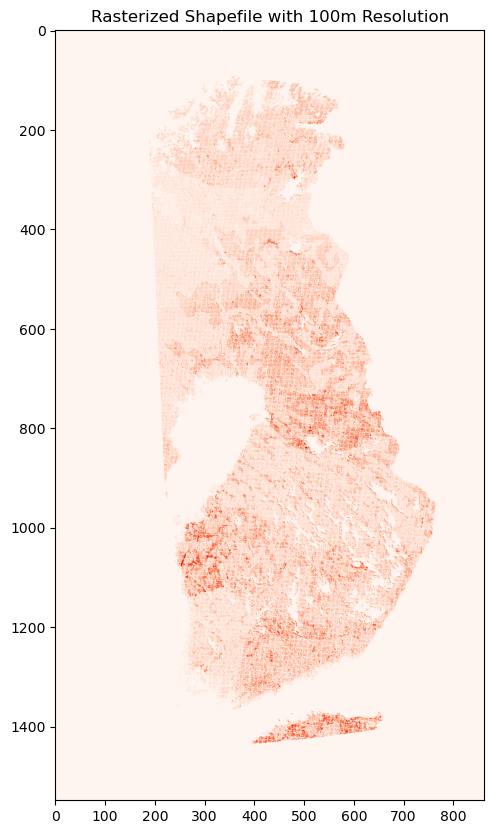

In [563]:
master_raster = np.array(master_df2.pivot(index="y", columns="x", values="Pine").reset_index(drop=True).iloc[::-1].fillna(0))
plt.figure(figsize=(12, 10))
plt.imshow(master_raster, cmap='Reds')
plt.title("Rasterized Shapefile with 100m Resolution")
# plt.colorbar()
plt.show()

# Background map

In [51]:
mm_to_fin = pyproj.Transformer.from_crs("EPSG: 3386", "EPSG: 3067")
def convert(x, y):
    y_fin, x_fin = mm_to_fin.transform(x, y)
    y_fin, x_fin = round(y_fin, -2), round(x_fin, -2)
    return x_fin,y_fin

In [ ]:
data = []
for index, row in master_df2.iterrows():
    x, y = convert(row.x, row.y)
    data.append([x,y])

KeyboardInterrupt: 

In [75]:
master_df3 = master_df2.copy()
master_df3["x"] = master_df2[["x", "y"]].apply(lambda row: convert(row.x, row.y)[0], axis=1)
master_df3["y"] = master_df2[["x", "y"]].apply(lambda row: convert(row.x, row.y)[1], axis=1)
master_df3

x          y  soil                       land  land_coeff  \
0         360800.0  5159500.0  none          Coniferous forest        1.00   
1         360800.0  5160400.0  none               Water bodies        1.00   
2         360800.0  5161200.0  none  Non-irrigated arable land        0.67   
3         360800.0  5162100.0  none             Inland marshes        0.67   
4         360800.0  5162900.0  none               Water bodies        1.00   
...            ...        ...   ...                        ...         ...   
1009582  1053300.0  6298400.0  none                       none         NaN   
1009583  1053300.0  6299200.0  none                       none         NaN   
1009584  1053200.0  6300000.0  none                       none         NaN   
1009585  1054100.0  6299300.0  none                       none         NaN   
1009586  1054000.0  6300100.0  none                       none         NaN   

         color  color2  
0            1       0  
1            1       0  
2            1       0  
3            1       0  
4            1       0  
...        ...     ...  
1009582      0       0  
1009583      0       0  
1009584      0       0  
1009585      0       0  
1009586      0       0  

[1009587 rows x 7 columns]

In [101]:
# master_df3["x"], master_df3["y"] = master_df3["x"].round(-3), master_df3["y"].round(-3)
master_df4 = master_df3.groupby(["x","y"])["color2"].max().reset_index()
master_df4

x          y  color2
0        361000.0  5160000.0       0
1        361000.0  5161000.0       0
2        361000.0  5162000.0       0
3        361000.0  5163000.0       0
4        361000.0  5164000.0       0
...           ...        ...     ...
725704  1096000.0  5273000.0       0
725705  1096000.0  5274000.0       0
725706  1097000.0  5269000.0       0
725707  1097000.0  5270000.0       0
725708  1097000.0  5271000.0       0

[725709 rows x 3 columns]

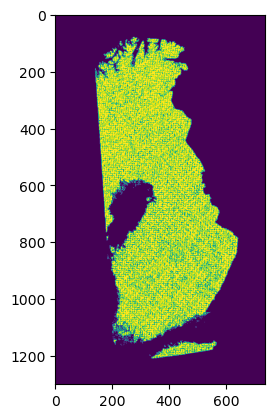

<Axes: >

In [103]:
show(np.array(master_df4.pivot(index="y", columns="x", values="color2").reset_index(drop=True).iloc[::-1].fillna(0)), cmap="viridis")

# Border

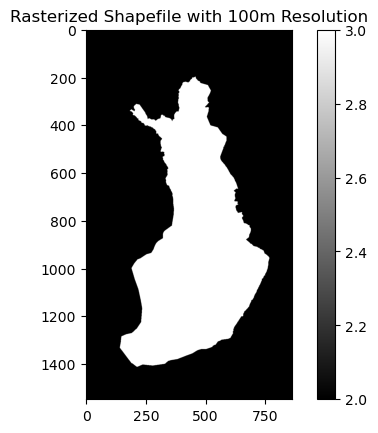

In [208]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.features import geometry_mask
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

# Load your shapefile (e.g., regions of interest)
gdf = gpd.read_file("SuomenHallinnollisetKuntajakopohjaisetAluejaot_2024_4500k.gpkg").to_crs("EPSG:3386")

# Define the resolution (100 meters)
resolution = 1000  # in meters

# Set up the raster grid's extent (bounds) based on the shapefile
minx, miny, maxx, maxy = master_df2.x.min(), master_df2.y.min(), master_df2.x.max(), master_df2.y.max()

# Define the transform (top-left corner and pixel size)
# The transform will define the "spatial reference" of the grid
transform = from_origin(minx, maxy, resolution, resolution)

# Define the shape of the raster (number of rows and columns)
width = int((maxx - minx) / resolution) + 1
height = int((maxy - miny) / resolution) + 1

# Create a raster array (initialized with zeros)
raster = np.zeros((height, width), dtype=np.uint8)

# Now, rasterize the shapefile
# Convert the shapefile's geometries into the raster grid
for geom in gdf.geometry:
    # Use the geometry to generate the mask for this shape (True where inside the polygon)
    mask = geometry_mask([geom], transform=transform, invert=True, out_shape=(height, width))
    # Fill the pixels corresponding to the shape with a value, for example, 1
    raster[mask] = 1  # Assign value 1 inside the polygons

# Plot the rasterized map
mask_raster = raster - 254
plt.imshow(mask_raster, cmap='gray')
plt.title("Rasterized Shapefile with 100m Resolution")
plt.colorbar()
plt.show()


C:\Users\pyryp\AppData\Local\Temp\ipykernel_18500\1385427985.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


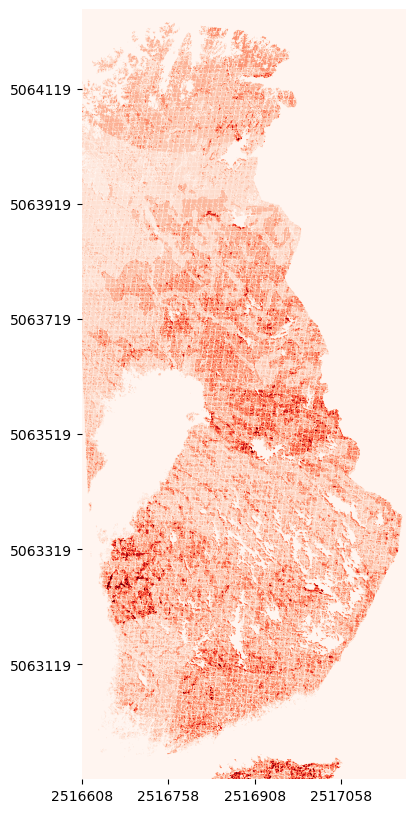

In [ ]:
# masked_raster_data = np.ma.masked_where(mask_raster, master_raster)
masked_raster_data = master_raster * (mask_raster - 2)

fig, ax = plt.subplots(figsize=(12, 10))

# Display the raster data with a slice
ax.imshow(np.array(pd.DataFrame(master_raster).iloc[70:-140, 210:-90]), cmap='Reds')

# Hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

xmin = 419000 + (210 * 9988.4)
ymin = 6462000 + (-140 * 9993.5) + 9

xticks = [0, 150, 300, 450]
yticks = [138, 338, 538, 738, 938, 1138, 1338]
# yticks = [x - 9 for x in yticks]

xlabels = [round(x + xmin) + 44 for x in xticks]
# xlabels = [format(x, '.2e') for x in xlabels]
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

ylabels = [ymin + (6 * 200), ymin + (5 * 200), ymin + (4 * 200), ymin + (3 * 200), ymin + (2 * 200), ymin + (1 * 200), ymin]
ylabels = [round(x) for x in ylabels]
# ylabels = [format(x, '.2e') for x in ylabels]

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)

cax = ax.imshow(np.array(pd.DataFrame(master_raster).iloc[70:-140, 210:-90]), cmap='Reds', vmin=0, vmax=1.5)
# cbar = fig.colorbar(cax, ax=ax)

# Redraw the figure to update the modified labels
fig.canvas.draw()

# Display the plot
fig.show()

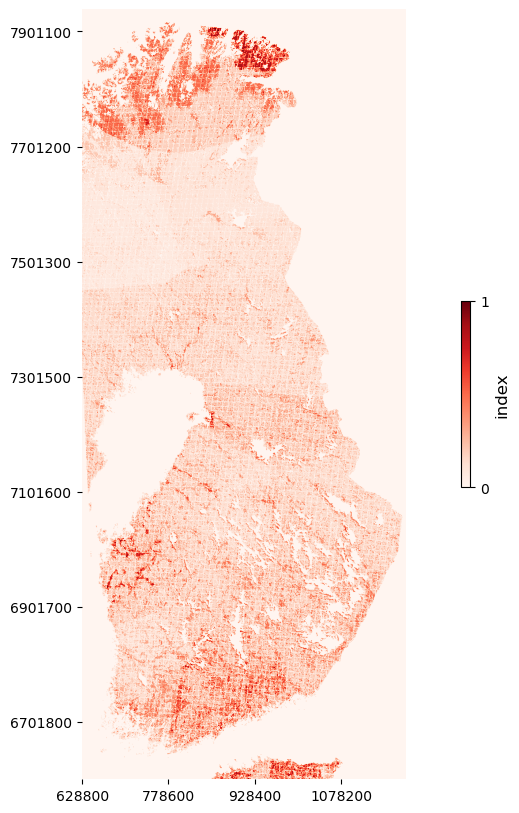

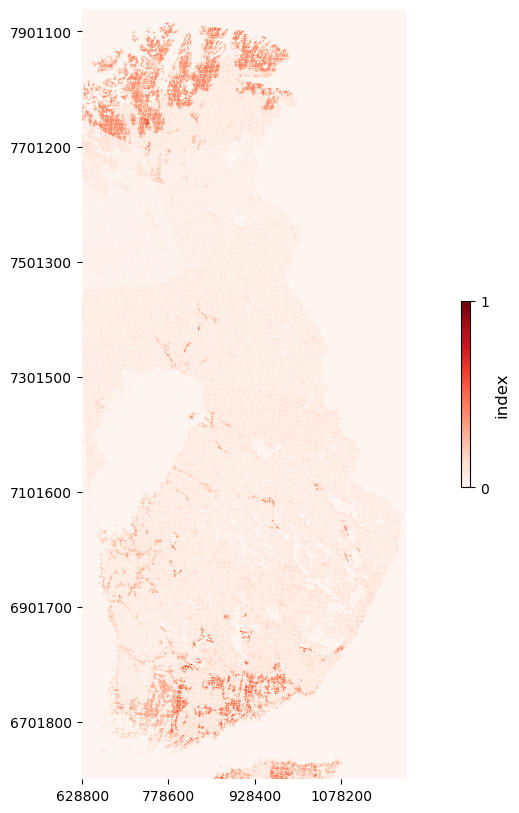

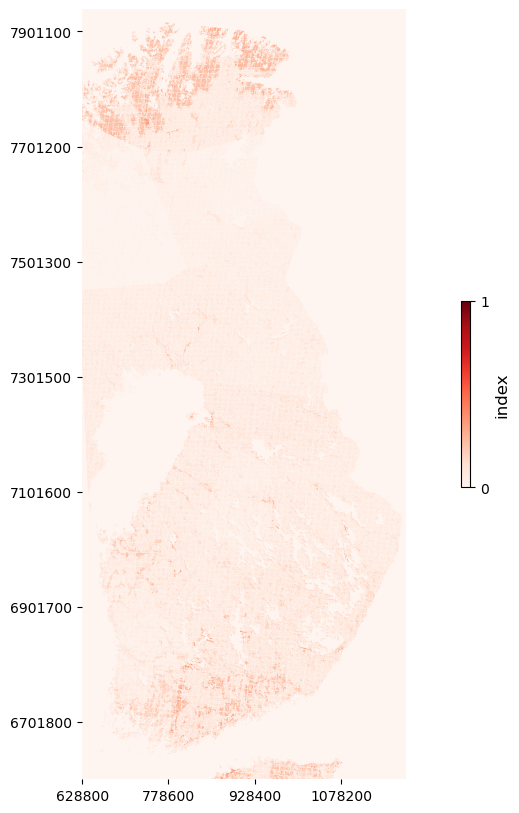

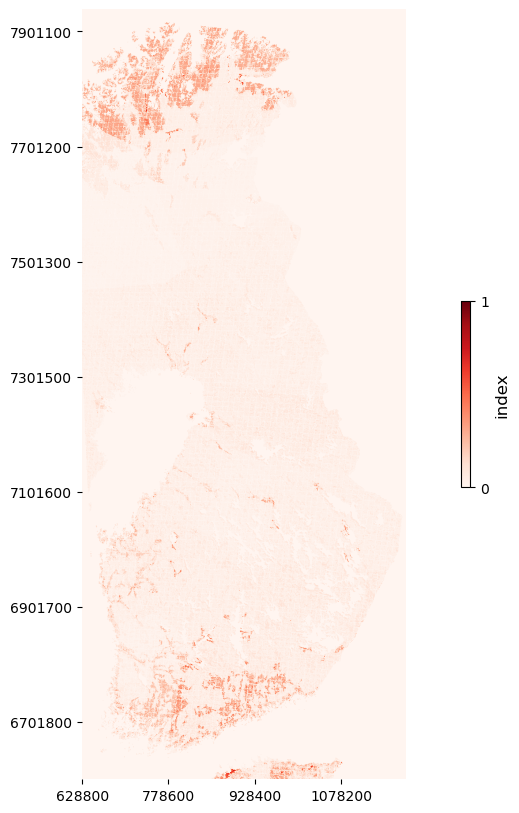

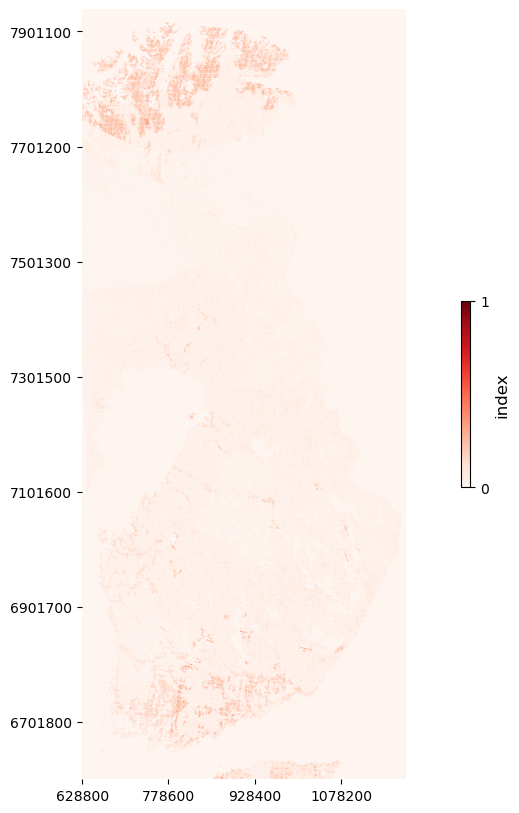

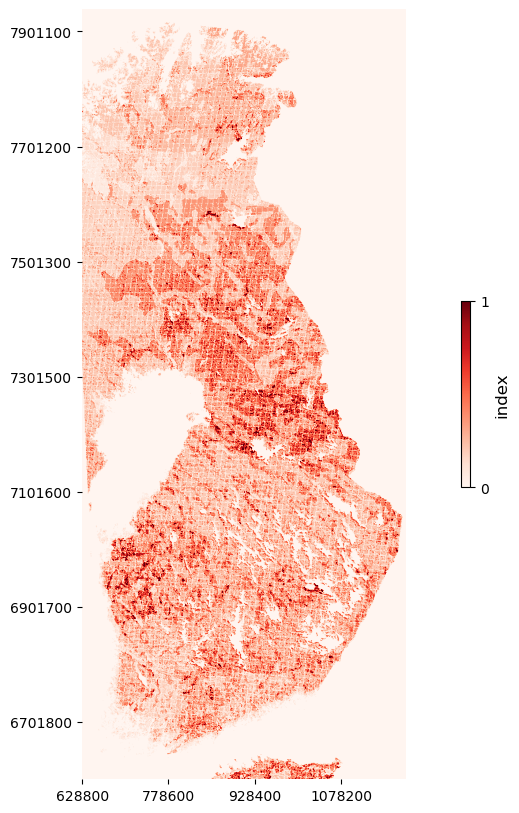

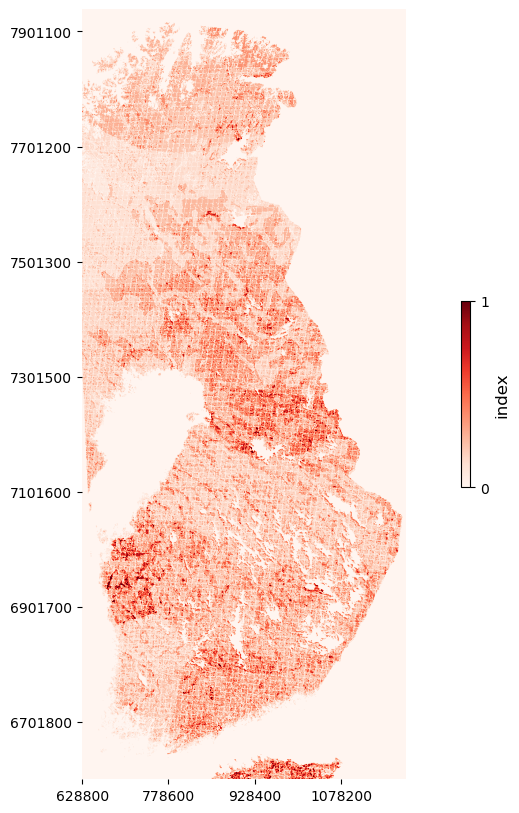

In [692]:
# SAVER
for i, tree in enumerate(trees):
    # weather_raster = weather_rasters[i] * 2
    master_raster = np.array(master_df2.pivot(index="y", columns="x", values=tree).reset_index(drop=True).iloc[::-1].fillna(0))

    fig, ax = plt.subplots(figsize=(12, 10))

    # Display the raster data with a slice
    ax.imshow(np.array(pd.DataFrame(master_raster).iloc[70:-140, 210:-90]), cmap='Reds')

    # Hide axis spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    xmin = 419000 + (210 * 998.84)
    ymin = 6462000 + (140 * 999.35) + (100 * 999.35)

    xticks = [0, 150, 300, 450]
    xlabels = [xmin, xmin+150*998.84, xmin+300*998.84, xmin+450*998.84]
    xlabels = [int(round(x, -2)) for x in xlabels]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)

    yticks = [138, 338, 538, 738, 938, 1138, 1338]
    yticks = [x - 100 for x in yticks]

    ylabels = [ymin + (6 * 200 * 999.35), ymin + (5 * 200 * 999.35), ymin + (4 * 200 * 999.35), ymin + (3 * 200 * 999.35), ymin + (2 * 200 * 999.35), ymin + (1 * 200 * 999.35), ymin]
    ylabels = [int(round(x, -2)) for x in ylabels]

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)

    cax = ax.imshow(np.array(pd.DataFrame(master_raster).iloc[70:-140, 210:-90]), cmap='Reds', vmin=0, vmax=1)
    cbar = fig.colorbar(cax, ax=ax, fraction=0.01, pad=0.06)
    cbar.set_ticks([0, 1])
    cbar.set_label("index", fontsize=12)

    # Redraw the figure to update the modified labels
    fig.canvas.draw()

    fig.savefig(f"./images/{tree}.png")

### Folium tests

In [38]:
# geometry = [Point(xy) for xy in zip(master_df2["x"], master_df2["y"])]
# gdf = gpd.GeoDataFrame(master_df2, geometry=geometry)

# # Set a Coordinate Reference System (CRS)
# gdf.set_crs(epsg=3386, inplace=True)

# gdf

In [39]:
fin_to_gps = pyproj.Transformer.from_crs("EPSG: 3386", "EPSG: 4326")
def convert(x, y):
    y_fin, x_fin = fin_to_gps.transform(y, x)
    # y_fin, x_fin = round(y_fin, 5), round(x_fin, 5)
    return x_fin,y_fin

In [40]:
convert(673771.199164,	6462000.0)

(20.95577296253436, 58.240186460560295)

In [41]:
master_data = []
for i in master_df2:
    x = master_df2["x"][i]
    y = master_df2["y"][i]
    value = master_df2["color"][i]
    newx, newy = convert(x,y)
    master_data.append([newx, newy, value])

master_gps_df = pd.DataFrame(master_data, columns=["x", "y", "color"])
master_gps_df

KeyError: 'x'

In [ ]:
master_gps_df.drop_duplicates("y", inplace=True)
master_gps_df

x          y  color
0      16.589348  58.948970      1
1      16.588981  58.957944      1
2      16.588615  58.966918      1
3      16.588248  58.975893      1
4      16.587880  58.984867      1
...          ...        ...    ...
99995  19.752066  65.595310      1
99996  19.752670  65.604275      1
99997  19.753274  65.613239      1
99998  19.753879  65.622203      1
99999  19.754484  65.631167      1

[100000 rows x 3 columns]

In [ ]:
bounds = master_gps_df.y.min(), master_gps_df.x.min(), master_gps_df.y.max(), master_gps_df.x.max()
bounds

(58.78751020440026, 16.58714493640418, 70.69408049477086, 20.162226243698154)

In [ ]:
np.array(master_gps_df.sample(frac=0.01).pivot(index="y", columns="x", values="color").reset_index(drop=True).iloc[::-1].fillna(0))

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
m = folium.Map([38, -122], zoom_start=8)
rasdata_normed = np.array(master_gps_df.sample(frac=0.01).pivot(index="y", columns="x", values="color").reset_index(drop=True).iloc[::-1].fillna(0))

folium.raster_layers.ImageOverlay(
    image=rasdata_normed,
    name='sample map',
    opacity=0.5,
    bounds=[bounds[0], bounds[1], bounds[2], bounds[3]],
    interactive=False,
    zindex=1,
).add_to(m)
folium.LayerControl().add_to(m)

m